In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
def wrangle(file):
    try:
        #read file into dataframe
        df = pd.read_csv(file)
        #collinear and high_cardinal features
        cols_to_drop = ['Data.Temperature.Max Temp', 'Data.Temperature.Min Temp', 'Data.Wind.Direction','Date.Month', 'Date.Week of', 'Date.Year']
        #drop collinear and high_cardinal features
        df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)
        #drop categorical features
        df.drop(columns=(df.select_dtypes('object').columns), inplace=True)  
        #rename columns for readability
        column_dict = {
            'Data.Precipitation':'precipitation',
            'Data.Temperature.Avg Temp': 'temperature',
            'Data.Wind.Speed': 'wind'
        } 
        
        df.rename(columns=column_dict, inplace=True)
        #reorder columns
        df = df[['wind', 'temperature', 'precipitation']]

        #remove wind outliers
        low, high = df['wind'].quantile([0.06,0.98])#iqr*1.5
        mask_wind = df['wind'].between(low,high)

        #remove temp outliers
        low_1, high_1 = df['temperature'].quantile([0.00165,1.0])#iqr*1.5
        mask_temp = df['temperature'].between(low_1, high_1)

        #remove prec outliers

        low_2, high_2 = df['precipitation'].quantile([0.82,0.923])#iqr*1.5
        mask_prec = df['precipitation'].between(low_2, high_2)


        df = df[mask_wind & mask_temp & mask_prec]


        return df
        
    except FileNotFoundError:
        print(f"Error: The file '{file}' was not found.")

In [108]:
df = wrangle('weather.csv')
df.describe()

,wind,temperature,precipitation
count,1665.000000,1665.000000,1665.000000
mean,6.437532,58.425826,1.419712
std,2.425967,16.672451,0.235775
min,2.000000,5.000000,1.070000
25%,4.700000,46.000000,1.220000
50%,6.180000,58.000000,1.390000
75%,7.900000,73.000000,1.600000
max,14.110000,88.000000,1.900000


In [56]:
df.columns

Index(['wind', 'temperature', 'precipitation'], dtype='object')

In [57]:
#Is there a relationship between wind speed and precipitation? is precipitation dependent on wind speed


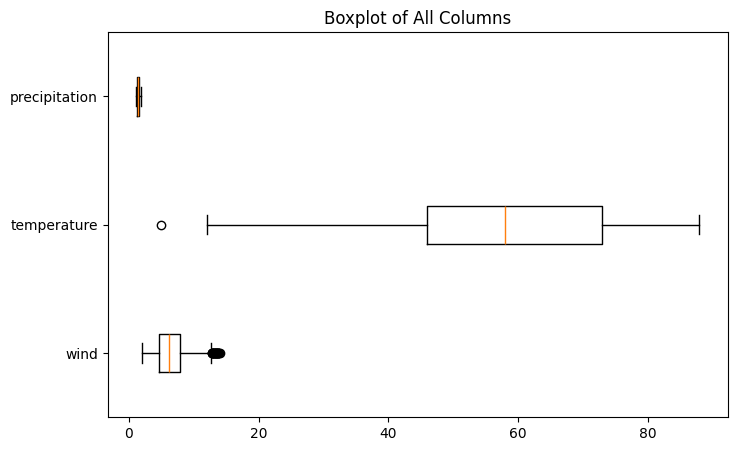

In [109]:
#visualize variables with boxplot
def plot_box(file):
    #get columns
    cols = file.columns
    #set fig size
    fig, ax = plt.subplots(figsize=(8,5))
    #loop through columns
    ax.boxplot([file[col] for col in cols], vert=False, tick_labels=file.columns)
    #ax.set_xlabel(df[col].name)
    ax.set_title('Boxplot of All Columns')
    #show figure
    plt.show();

#call figure
figure = plot_box(df)

In [59]:
df.describe()

,wind,temperature,precipitation
count,15412.000000,15412.000000,15412.000000
mean,6.396775,56.391513,0.592988
std,2.617540,18.404657,0.995989
min,2.000000,-21.000000,0.000000
25%,4.380000,44.000000,0.010000
50%,6.080000,58.000000,0.210000
75%,8.080000,71.000000,0.770000
max,14.220000,100.000000,20.890000


In [101]:
outl=df['precipitation'].quantile(0.923)
outl

1.91

In [83]:
iqr =(df['precipitation'].quantile(0.75) - df['precipitation'].quantile(0.25))
iqr

0.76

In [84]:
lim=(iqr*1.5)
up =lim + df['precipitation'].quantile(0.75)
lowp= lim-df['precipitation'].quantile(0.25)
print(up)
print(lowp)

1.9100000000000001
1.1300000000000001


In [63]:
df['wind'].describe()

count    15412.000000
mean         6.396775
std          2.617540
min          2.000000
25%          4.380000
50%          6.080000
75%          8.080000
max         14.220000
Name: wind, dtype: float64

In [64]:
df['wind'].describe()['mean']

6.396774591227615